In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn

import torch.optim as optim
from torch.utils.data import DataLoader


In [2]:
training_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.MNIST(
    root = "data",
    train = False,
    download =True,
    transform = ToTensor()
)

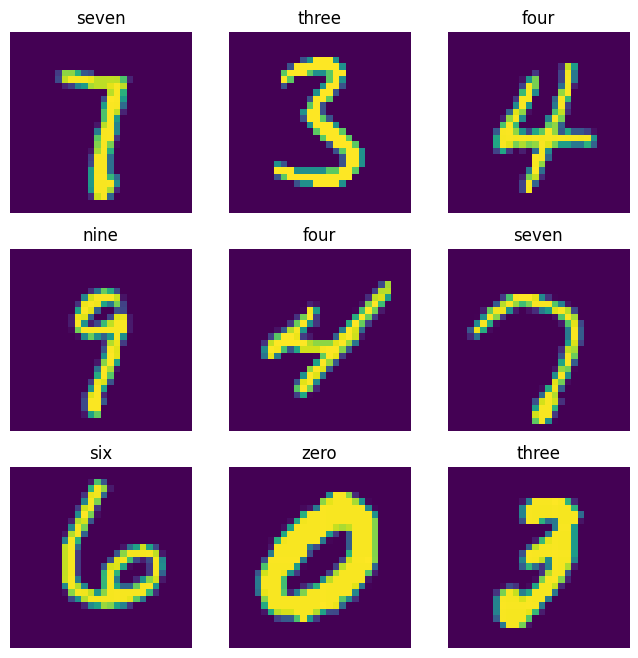

In [3]:
labels_map = {
    0:'zero',										
    1:'one',										
    2:'two',									
    3:'three',										
    4:'four',										
    5:'five',									
    6:'six',										
    7:'seven',										
    8:'eight',										
    9:'nine',
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    
    img = img.permute(1, 2, 0)
    
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img)
    
plt.show()

In [4]:
class MNISTBuilder(nn.Module):
    def __init__(self, num_inputs, num_outpus, num_hiddens):
        super().__init__()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * 0.01)
        self.b1 = nn.Parameter(torch.randn(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outpus) * 0.01)
        self.b2 = nn.Parameter(torch.randn(num_hiddens))

    def forward(self, o):

        u = nn.Flatten()
        X = u(o)
        k = nn.ReLU()
        d = torch.matmul(X, self.W1) + self.b1
        H = k(d)
        return torch.matmul(H, self.W2) + self.b2
    


In [5]:
model = MNISTBuilder(784, 784, 784)

crit = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)     

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [6]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad() 
        outputs = model(inputs)
        loss = crit(outputs, labels)
        loss.backward()  
        optimizer.step()  
        total_loss += loss.item()

   
    avg_loss = total_loss / len(train_dataloader)

    
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/10, Loss: 2.7703
Epoch 2/10, Loss: 2.1555
Epoch 3/10, Loss: 1.9580
Epoch 4/10, Loss: 1.6913
Epoch 5/10, Loss: 1.4155
Epoch 6/10, Loss: 1.1856
Epoch 7/10, Loss: 1.0125
Epoch 8/10, Loss: 0.8851
Epoch 9/10, Loss: 0.7902
Epoch 10/10, Loss: 0.7187


In [7]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 84.86%
